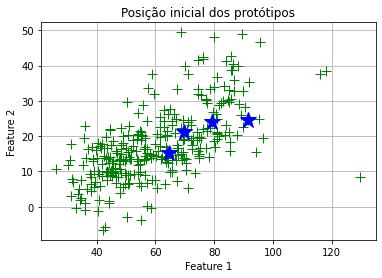

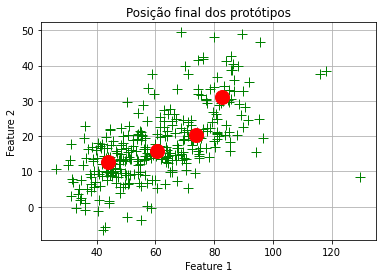

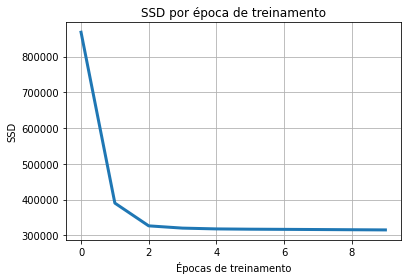

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Leitura do conjunto de dados
X = np.loadtxt('datasetTC4.dat')

N, M = X.shape

K = 4  # Número de protótipos escolhido

# Posição inicial dos protótipos
I = np.random.choice(N, K, replace=False)
W = X[I, :]

plt.figure()
plt.plot(X[:, 0], X[:, 1], 'g+', markersize=10, linewidth=3)
plt.plot(W[:, 0], W[:, 1], 'b*', markersize=17, linewidth=4)
plt.grid()
plt.title('Posição inicial dos protótipos')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Ne = 10  # Número de iterações

SSD = np.zeros(Ne)

for r in range(Ne):
    # Busca pelo protótipo mais próximo do vetor de atributos
    Dmin = np.linalg.norm(X - W[:, np.newaxis, :], axis=-1).min(axis=0)
    Icluster = np.argmin(np.linalg.norm(X - W[:, np.newaxis, :], axis=-1), axis=0)

    SSD[r] = np.sum(Dmin ** 2)

    # Particiona dados em K subconjuntos e atualiza protótipo correspondente
    for k in range(K):
        I = np.where(Icluster == k)[0]
        Particao = X[I, :]
        W[k, :] = np.mean(Particao, axis=0)

    # Calcula SSD
    Dmin = np.linalg.norm(X - W[:, np.newaxis, :], axis=-1).min(axis=0)
    Icluster = np.argmin(np.linalg.norm(X - W[:, np.newaxis, :], axis=-1), axis=0)

# Mostra posição final dos protótipos
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'g+', markersize=10, linewidth=3)
plt.plot(W[:, 0], W[:, 1], 'ro', markersize=14, linewidth=4)
plt.grid()
plt.title('Posição final dos protótipos')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Mostra evolução do SSD ao longo das épocas de treinamento
plt.figure()
plt.plot(SSD, linewidth=3)
plt.grid()
plt.xlabel('Épocas de treinamento')
plt.ylabel('SSD')
plt.title('SSD por época de treinamento')
plt.show()
